In [1]:
# Install required packages.
import os
import torch
import numpy as np
from scipy import stats
import networkx as nx
import torch_geometric
from torch_geometric.datasets import TUDataset
from torch_geometric.utils import homophily
import csv
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
D:\anaconda3\lib\site-packages\torch_geometric\typing.py:71: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: [WinError 127] La procédure spécifiée est introuvable
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
D:\anaconda3\lib\site-packages\torch_geometric\typing.py:109: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: [WinError 127] La procédure spécifiée est introuvable
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
D:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.

2.2.0+cpu


In [2]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='data/TUDataset', name='MUTAG')

torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 38


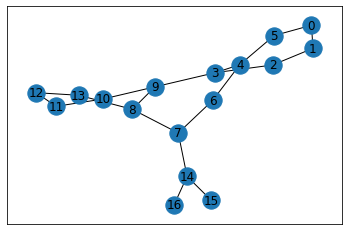

In [3]:
import networkx as nx
import torch_geometric
graph = train_dataset[0]
g = torch_geometric.utils.to_networkx(graph, to_undirected=True)
nx.draw_networkx(g)

In [4]:
graph.x

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])

In [5]:
torch.argmax(graph.x, dim=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2])

In [6]:
homophily(graph.edge_index, torch.argmax(graph.x, dim=1), method='edge')

0.8421052694320679

In [7]:
homophily(graph.edge_index, torch.argmax(graph.x, dim=1), method='node')

0.8039215803146362

In [8]:
train_dataset.x.shape

torch.Size([2714, 7])

In [9]:
torch.argmax(train_dataset.x, dim=1).shape

torch.Size([2714])

In [10]:
homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='edge')

0.7203870415687561

In [11]:
homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='node')

0.6603721976280212

In [12]:
homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='edge_insensitive')

0.03396705910563469

In [13]:
def get_homophily(location, name_location,name_dataset,seed_id=12345):
    # Name of the CSV file
    csv_file = "homophily_data.csv"
    
    # Check if the file exists
    file_exists = os.path.exists(csv_file)
    
    # Open CSV file in append mode if it exists, otherwise in write mode
    mode = 'a' if file_exists else 'w'
    
    dataset = location(root='data/' + str(name_location), name=name_dataset)

    torch.manual_seed(seed_id)
    dataset = dataset.shuffle()
    length_train_dataset = int(np.ceil(0.8*len(dataset)))

    train_dataset = dataset[:length_train_dataset]
    test_dataset = dataset[length_train_dataset:]
    
    homophily_edge_train = round(homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='edge'),3)
    homophily_node_train = round(homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='node'),3)
    homophily_edge_insensitive_train = round(homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='edge_insensitive'),3)
    
    homophily_edge_test = round(homophily(test_dataset.edge_index, torch.argmax(test_dataset.x, dim=1), method='edge'),3)
    homophily_node_test = round(homophily(test_dataset.edge_index, torch.argmax(test_dataset.x, dim=1), method='node'),3)
    homophily_edge_insensitive_test = round(homophily(test_dataset.edge_index, torch.argmax(test_dataset.x, dim=1), method='edge_insensitive'),3)
    
    line_csv = [
    {"Name_Dataset": name_dataset, "Seed": seed_id,
     "Homophily_edge_train": homophily_edge_train, "Homophily_edge_test": homophily_edge_test,
     "Homophily_node_train": homophily_node_train, "Homophily_node_test": homophily_node_test,
     "Homophily_edge_insensitive_train": homophily_edge_insensitive_train, "Homophily_edge_insensitive_test": homophily_edge_insensitive_test}
        ]
    
    # Writing to CSV file
    with open(csv_file, mode, newline='') as file:
        # Define column names
        fieldnames = ["Name_Dataset", "Seed",
                      "Homophily_edge_train", "Homophily_edge_test",
                      "Homophily_node_train", "Homophily_node_test",
                      "Homophily_edge_insensitive_train", "Homophily_edge_insensitive_test"]
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        # Write header only if file is created newly
        if not file_exists or os.path.getsize(csv_file) == 0:
            writer.writeheader()


        # Write data rows
        for row in line_csv:
            writer.writerow(row)

    print("Name of the dataset: " + name_dataset)
    print(f'Number of training graphs: {len(train_dataset)}')
    print(f'Number of test graphs: {len(test_dataset)}')
    print("Homophily with the edge formula (train/test): " + str(homophily_edge_train) + " | " + str(homophily_edge_test))
    print("Homophily with the node formula (train/test): " + str(homophily_node_train) + " | " + str(homophily_node_test))
    print("Homophily with the edge_insensitive formula (train/test): " + str(homophily_edge_insensitive_train) + " | " + str(homophily_edge_insensitive_test))
    print("CSV file created successfully:", csv_file)

In [14]:
get_homophily(TUDataset, 'TUDataset' , 'Mutag')

Name of the dataset: Mutag
Number of training graphs: 151
Number of test graphs: 37
Homophily with the edge formula (train/test): 0.721 | 0.722
Homophily with the node formula (train/test): 0.661 | 0.662
Homophily with the edge_insensitive formula (train/test): 0.034 | 0.035
CSV file created successfully: homophily_data.csv


In [15]:
get_homophily(TUDataset, 'TUDataset' , 'ENZYMES')

Name of the dataset: ENZYMES
Number of training graphs: 480
Number of test graphs: 120
Homophily with the edge formula (train/test): 0.667 | 0.66
Homophily with the node formula (train/test): 0.665 | 0.664
Homophily with the edge_insensitive formula (train/test): 0.37 | 0.399
CSV file created successfully: homophily_data.csv


In [16]:
get_homophily(TUDataset, 'TUDataset' , 'PROTEINS')

Name of the dataset: PROTEINS
Number of training graphs: 891
Number of test graphs: 222
Homophily with the edge formula (train/test): 0.657 | 0.654
Homophily with the node formula (train/test): 0.652 | 0.648
Homophily with the edge_insensitive formula (train/test): 0.372 | 0.367
CSV file created successfully: homophily_data.csv


In [17]:
from torch_geometric.datasets import GNNBenchmarkDataset

In [18]:
get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'PATTERN')

Name of the dataset: PATTERN
Number of training graphs: 8000
Number of test graphs: 2000
Homophily with the edge formula (train/test): 0.333 | 0.333
Homophily with the node formula (train/test): 0.333 | 0.333
Homophily with the edge_insensitive formula (train/test): 0.0 | 0.0
CSV file created successfully: homophily_data.csv


In [19]:
get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'CLUSTER')

Name of the dataset: CLUSTER
Number of training graphs: 8000
Number of test graphs: 2000
Homophily with the edge formula (train/test): 0.905 | 0.905
Homophily with the node formula (train/test): 0.901 | 0.901
Homophily with the edge_insensitive formula (train/test): 0.009 | 0.0
CSV file created successfully: homophily_data.csv


In [20]:
#Features continues
#get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'MNIST')

In [21]:
get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'CIFAR10')

Name of the dataset: CIFAR10
Number of training graphs: 36000
Number of test graphs: 9000
Homophily with the edge formula (train/test): 0.779 | 0.777
Homophily with the node formula (train/test): 0.781 | 0.779
Homophily with the edge_insensitive formula (train/test): 0.646 | 0.635
CSV file created successfully: homophily_data.csv


In [22]:
#Features continues
#get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'TSP')

In [23]:
#No features
#get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'CSL')